# Improving Claims Processing Speed

This workspace is broken down into the following sections:
1. Task 1 - Data validation and data cleaning
2. Task 2 - Data visualization - No. of claims by location
3. Task 3 - Data visualization - Distribution of time to close claims
4. Task 4 - Data visualization - Relationship between time to close and location


## Task 1



In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# imports the csv file
claims = pd.read_csv('food_claims_2212.csv')
claims.head()

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable


In [3]:
claims.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   object 
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


In [4]:
claims.describe()

,claim_id,time_to_close,amount_paid,individuals_on_claim
count,2000.000000,2000.00000,1964.000000,2000.000000
mean,1000.500000,185.56800,21541.975183,8.049500
std,577.494589,49.16339,12530.156509,4.087347
min,1.000000,76.00000,1516.720000,1.000000
25%,500.750000,158.00000,10995.950000,4.000000
50%,1000.500000,179.00000,20105.700000,8.000000
75%,1500.250000,204.00000,30709.350000,12.000000
max,2000.000000,518.00000,52498.750000,15.000000


In [5]:
# checking number unique values in each column
for column in claims:
    print(column, ':', claims[column].nunique())

claim_id : 2000
time_to_close : 256
claim_amount : 2000
amount_paid : 1963
location : 4
individuals_on_claim : 15
linked_cases : 2
cause : 5


In [6]:
# checking the unique values itself in some of the columns
exclude_columns = ['claim_id', 'time_to_close', 'claim_amount', 'amount_paid', 'individuals_on_claim']
for column in claims:
  if column not in exclude_columns:
    print(column, ':', claims[column].unique())

location : ['RECIFE' 'FORTALEZA' 'SAO LUIS' 'NATAL']
linked_cases : [False True nan]
cause : ['unknown' 'meat' 'vegetable' ' Meat' 'VEGETABLES']


In [7]:
# attempting to clean the data
# cleaning the currency first
claims_clean = claims
claims_clean['claim_amount'] = claims['claim_amount'].str.replace('[^\d.]','', regex=True)
claims_clean['claim_amount'] = claims_clean['claim_amount'].astype(float)
claims_clean['claim_amount'].head()

0    74474.55
1    52137.83
2    24447.20
3    29006.28
4    19520.60
Name: claim_amount, dtype: float64

In [8]:
claims_clean.describe()

,claim_id,time_to_close,claim_amount,amount_paid,individuals_on_claim
count,2000.000000,2000.00000,2000.000000,1964.000000,2000.000000
mean,1000.500000,185.56800,27156.965235,21541.975183,8.049500
std,577.494589,49.16339,16195.783099,12530.156509,4.087347
min,1.000000,76.00000,1637.940000,1516.720000,1.000000
25%,500.750000,158.00000,13758.952500,10995.950000,4.000000
50%,1000.500000,179.00000,24821.085000,20105.700000,8.000000
75%,1500.250000,204.00000,38581.350000,30709.350000,12.000000
max,2000.000000,518.00000,76106.800000,52498.750000,15.000000


In [9]:
# filling in missing amount_paid
claims_clean['amount_paid'] = claims['amount_paid'].fillna(claims['amount_paid'].median())

# filling in missing linked_cases
claims_clean['linked_cases'] = claims['linked_cases'].fillna(False)

# replacing VEGETABLES to vegetable and Meat to meat in causes
replacements = {'VEGETABLES':'vegetable', ' Meat':'meat'}
claims_clean['cause'] = claims['cause'].replace(replacements)

claims_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   float64
 3   amount_paid           2000 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          2000 non-null   bool   
 7   cause                 2000 non-null   object 
dtypes: bool(1), float64(2), int64(3), object(2)
memory usage: 111.5+ KB


In [10]:
# checking number unique values in each column
for column in claims_clean:
    print(column, ':', claims_clean[column].nunique())

claim_id : 2000
time_to_close : 256
claim_amount : 2000
amount_paid : 1964
location : 4
individuals_on_claim : 15
linked_cases : 2
cause : 3


In [11]:
# checking the unique values itself in some of the columns
for column in claims_clean:
  if column not in exclude_columns:
    print(column, ':', claims_clean[column].unique())

location : ['RECIFE' 'FORTALEZA' 'SAO LUIS' 'NATAL']
linked_cases : [False  True]
cause : ['unknown' 'meat' 'vegetable']


### Before cleaning:
The original data contained **2000 rows** and **8 columns**. 

The following describes each column in their original form (before cleaning):
* **claim_id**: has 2000 unique values as expected. This means there are no duplicates nor missing values. This column is perfectly fine.
* **time_to_close**: has no missing-values. All values are positive integers with a min of 76 and a max of 518. This column is perfectly fine.
* **claim_amount**: has no missing values. However, it was imported as an object due to the currency symbol. Will convert this column to decimals in the data cleaning step to ease calculations later.
* **amount_paid**: has 1964 non-missing values. The missing values will be replaced with the median *amount_paid* in the data cleaning step. Having said that, the non-missing values are all positive decimals - which is within expectations.
* **location**: has no missing values and has 4 unique values. Upon inspection the 4 unique values were 'RECIFE', 'FORTALEZA', 'SAO LUIS', 'NATAL'. These locations are what we expect. This column is perfectly fine. 
* **linked_cases**: has 1974 non-missing value and 3 unique values. Upon inspection the 3 unique values were True, False, NaN. The True and False were within expectations; the missing values will be replaced with False in the data cleaning step.
* **cause**: has 5 unique values - which is not supposed to be the case. Upon inspection, discovered the values in this column are 'unknown' 'meat' 'vegetable' ' Meat' 'VEGETABLES'. Will convert ' Meat' into 'meat' and 'VEGETABLES' into 'vegetable' during the data cleaning step.

### After cleaning:
The cleaned data has **2000 rows** and **8 columns**. No rows were removed.

The following describes each column of the cleaned data:
* **claim_id**: has 2000 unique values as expected. This means there are no duplicates nor missing values. This column is perfectly fine and is untouched.
* **time_to_close**: has no missing-values. All values are positive integers with a min of 76 and a max of 518. This column is perfectly fine and is untouched.
* **claim_amount**: converted into decimal. Has no missing values. All values are positive decimals as expected.
* **amount_paid**: The missing values have be replaced with the median *amount_paid*. Now has no missing values. All values are positive decimals as expected.
* **location**: has no missing values and has 4 unique values. Upon inspection the 4 unique values were 'RECIFE', 'FORTALEZA', 'SAO LUIS', 'NATAL'. These locations are what we expect. This column is perfectly fine and is untouched.
* **linked_cases**: missing values replaced with False. Now has no missing values. Only True/False in the column as expected.
* **cause**: converted ' Meat' into 'meat' and 'VEGETABLES' into 'vegetable'. No missing values. Now has 3 unique values. Values are now either 'unknown', 'meat', 'vegetable' as expected.

## Task 2

In [12]:
# finding the number of claims per location
locations = claims_clean.groupby('location')['claim_id'].count()
print(locations)

location
FORTALEZA    311
NATAL        287
RECIFE       885
SAO LUIS     517
Name: claim_id, dtype: int64


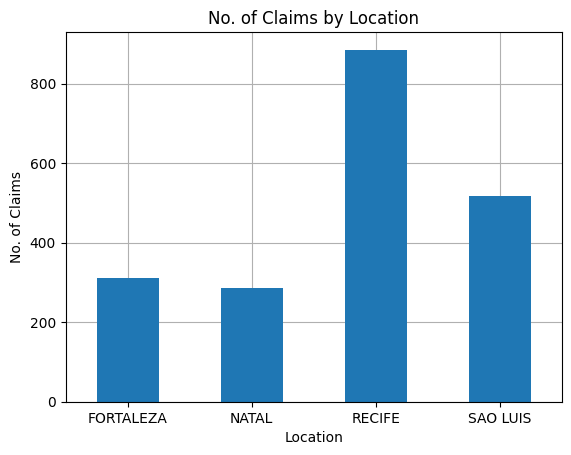

In [13]:
# plotting this
locations.plot(kind='bar')

plt.xlabel('Location')
plt.ylabel('No. of Claims')
plt.title('No. of Claims by Location')

plt.xticks(rotation=0)

# add grid lines
plt.grid(True, zorder=0)

# forces the bar plot to be on top of the grid lines
plt.gca().set_axisbelow(True)

plt.savefig('output/figure_1.png', dpi='figure')
plt.show()

### No. of claims by location.
The legal team intends to reduce the time spent to close claims. As a start it's worthwhile to see how many claims each location processess.

The bar plot above shows the number of claims at each location. Currently not all locations are processing the same number of claims. 
* The 'RECIFE' location closes the most claims with 885 claims. This is slightly more than 70% of 'SAO LUIS' at 2nd place.
* 'SAO LUIS' has 517 claims.
* 'NATAL' and 'FORTALEZA' are fairly close in number of claims, at 287 and 311 claims respectively.

To reduce the time spent to close claims, it's worth to look into why 'RECIFE' is processing so many claims (i.e.  could be a large number of short duration claims), and if it's worth to evenly distribute the number of claims among all locations. 


## Task 3

In [14]:
# taking a look at time_to_close claims across the board
time_to_close = claims_clean['time_to_close']
time_to_close.head()

0    317
1    195
2    183
3    186
4    138
Name: time_to_close, dtype: int64

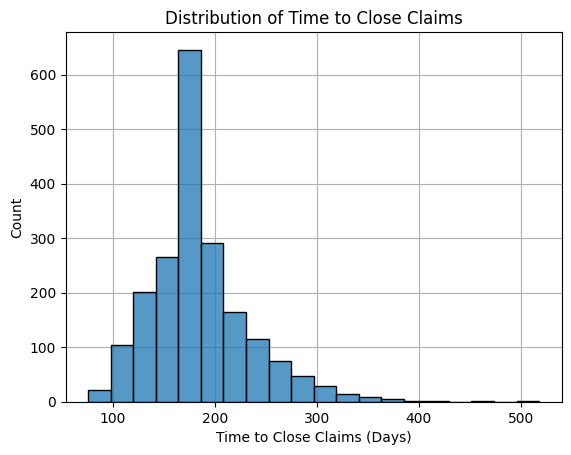

In [15]:
# plotting a histogram
sns.histplot(time_to_close, kde=False, bins=20)

plt.xlabel('Time to Close Claims (Days)')
plt.ylabel('Count')
plt.title('Distribution of Time to Close Claims')

# add grid line
plt.grid(True, zorder=0)

# forces the plot to be above the grid line
plt.gca().set_axisbelow(True)

plt.savefig('output/figure_2.png', dpi='figure')
plt.show()

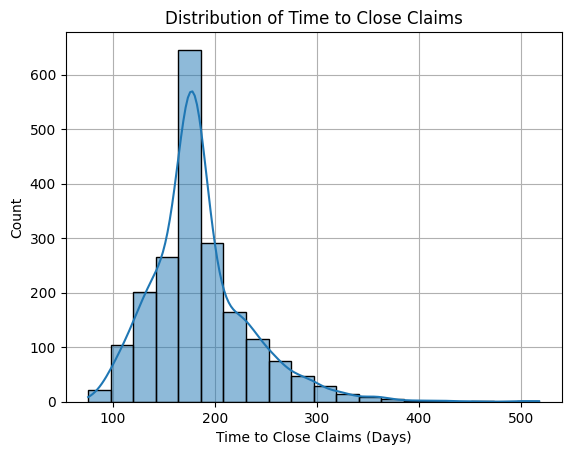

In [16]:
# plotting a histogram with a trendline
sns.histplot(time_to_close, kde=True, bins=20)

plt.xlabel('Time to Close Claims (Days)')
plt.ylabel('Count')
plt.title('Distribution of Time to Close Claims')

# add grid line
plt.grid(True, zorder=0)

# forces the plot to be above the grid line
plt.gca().set_axisbelow(True)

plt.savefig('output/figure_2.5.png', dpi='figure')
plt.show()

[]

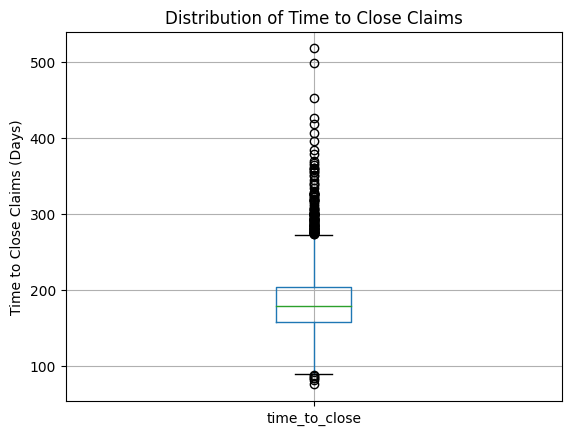

In [17]:
# let's see a box plot instead
claims_clean.boxplot(column='time_to_close')

plt.ylabel('Time to Close Claims (Days)')
plt.title('Distribution of Time to Close Claims')

plt.savefig('output/figure_3.png', dpi='figure')
plt.plot()

### Distribution of time to close for all locations
There are a few outliers in the time to close range of 350 to 518 days. The large majority of the days to close time are in the range of 158 days to 218 days. 

The histogram above shows the distribution.

The histogram below it is the same, but includes a trendline. A large number of claims in the 158 to 218 days range contributes to the histogram going above the trendline in the middle ranges.

Taking a look at the boxplot above it can be seen that the median time to close is 179 days. The average time to close is 185.57 days. Again, there is a large number of claims take between 158 days to 204 days to close. 

To reduce the overall time to close, it's a good idea find a method to reduce the processing time of claims that require between 158 days to 204 days to close, since a large number of claims require this amount of time to close. Reducing the time spent to close claims in this range will reduce the overall average time.

## Task 4

[]

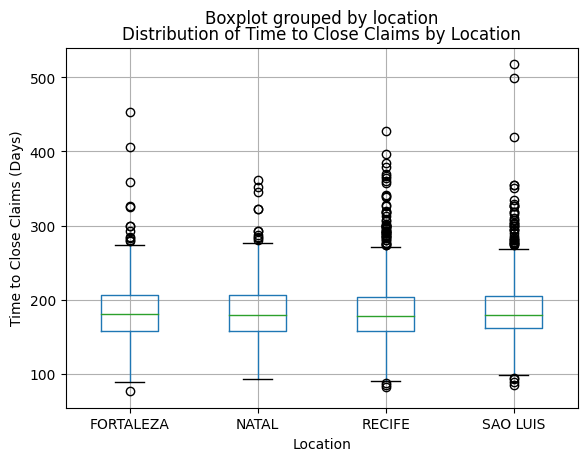

In [18]:
# let's see a box plot instead
claims_clean.boxplot(column='time_to_close', by ='location')

plt.xlabel('Location')
plt.ylabel('Time to Close Claims (Days)')
plt.title('Distribution of Time to Close Claims by Location')

plt.savefig('output/figure_4.png', dpi='figure')
plt.plot()

### Distribution of time to close by location
Taking a look at the boxplot above it can be seen that majority of claims take between 158 to 204 days to close for all 4 locations (i.e. their interquartile ranges are similar to each other). However, the range for 'RECIFE' is slightly tighter than the other 3. It is also worth noting their maximum and minimum are similar to each other too. 

This means that all 4 locations process a similar spread of claims that have similar durations to close (apart from the outliers).

Taking a look again at the bar plot in Task 1, 'RECIFE' and 'SAO LUIS' process more claims than the other 2 locations, but with a similar spread. A recommendation for the legal team is to spread the number of claims evenly among all 4 locations.

### Recommendation
Combining the information from the bar plot in Task 1 and the boxplot in Task 4 there are some recommendations to reduce the overall time to close claims.

The recommendations are as follows:
* Reduce the number of claims 'RECIFE' has to process. Spread the excess claims among the other 3 locations.
* Ensure all 4 locations have the same number (or if unfeasible at least similar number) of claims to process (i.e. share the workload).

By ensuring there's an even spread of claims for all 4 locations, it's possible to decrease the overall average time to close claims - especially for the more common claims that take 158 to 204 days to close - which are the most frequently occuring claim type the legal team has to process.